In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Preprocesamiento

# Inflación

In [12]:
inflacion_fusionado = pd.read_csv('../Inflacion/inflacion_fusionada.csv', encoding='latin1')
inflacion_fusionado

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,ASEAN-5,16.600000,12.000000,7.800000,7.300000,14.000000,6.800000,2.900000,5.300000,6.500000,...,3.000000,2.000000,2.800000,2.600000,1.900000,0.900000,2.000000,4.800000,3.500000,2.000000
1,Advanced economies,13.600000,11.100000,8.400000,6.100000,6.500000,5.500000,2.900000,3.200000,3.600000,...,0.300000,0.700000,1.700000,2.000000,1.400000,0.700000,3.100000,7.300000,4.600000,2.600000
2,Afghanistan,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,...,-0.661709,4.383892,4.975952,0.626149,2.302373,5.601888,5.133203,13.712102,-4.644709,-6.601186
3,Africa (Region),16.900000,15.900000,14.800000,16.200000,14.000000,13.900000,17.500000,17.000000,14.900000,...,7.200000,9.600000,12.600000,11.400000,9.400000,11.100000,12.300000,14.200000,18.200000,20.100000
4,Africa Eastern and Southern,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522258,...,5.245878,6.596505,6.399343,4.720805,4.644967,5.405162,7.240978,10.773751,7.126975,10.100749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Western Hemisphere (Region),22.900000,21.200000,20.900000,23.000000,24.200000,26.100000,21.500000,29.400000,41.900000,...,1.600000,2.400000,3.400000,3.700000,3.500000,2.700000,6.200000,9.800000,7.200000,6.900000
252,World,5.365736,12.442437,10.221727,8.669272,8.080320,6.807567,5.778113,5.710119,7.113407,...,1.443857,1.605539,2.254277,2.442583,2.206073,1.905664,3.475403,7.930929,5.733163,5.365736
253,Yemen,21.079394,17.254706,16.787135,18.415789,25.305263,89.905263,23.697076,97.301734,53.413295,...,22.000000,21.300000,30.400000,33.600000,15.700000,21.700000,31.500000,29.500000,0.900000,33.900000
254,"Yemen, Rep.",17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,...,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677


In [13]:
# Filtrar columnas de años
year_cols = [col for col in inflacion_fusionado.columns if col.startswith(('19', '20'))]


# ---------- a. Discretización ----------

inflacion_fusionado['Inflation_Avg'] = inflacion_fusionado[year_cols].mean(axis=1)

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
inflacion_fusionado['Inflation_Level'] = discretizer.fit_transform(inflacion_fusionado[['Inflation_Avg']]).astype(int)


# ---------- b. Normalización ----------
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(inflacion_fusionado[year_cols])

# ---------- c. Reducción de dimensiones ----------
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# ---------- d. Estandarización ----------
scaler_std = StandardScaler()
standardized_data = scaler_std.fit_transform(inflacion_fusionado[year_cols])


In [14]:
inflacion_fusionado

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2017,2018,2019,2020,2021,2022,2023,2024,Inflation_Avg,Inflation_Level
0,ASEAN-5,16.600000,12.000000,7.800000,7.300000,14.000000,6.800000,2.900000,5.300000,6.500000,...,2.800000,2.600000,1.900000,0.900000,2.000000,4.800000,3.500000,2.000000,6.164444,1
1,Advanced economies,13.600000,11.100000,8.400000,6.100000,6.500000,5.500000,2.900000,3.200000,3.600000,...,1.700000,2.000000,1.400000,0.700000,3.100000,7.300000,4.600000,2.600000,3.308889,0
2,Afghanistan,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,...,4.975952,0.626149,2.302373,5.601888,5.133203,13.712102,-4.644709,-6.601186,5.253530,1
3,Africa (Region),16.900000,15.900000,14.800000,16.200000,14.000000,13.900000,17.500000,17.000000,14.900000,...,12.600000,11.400000,9.400000,11.100000,12.300000,14.200000,18.200000,20.100000,14.493333,2
4,Africa Eastern and Southern,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522258,...,6.399343,4.720805,4.644967,5.405162,7.240978,10.773751,7.126975,10.100749,9.705824,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Western Hemisphere (Region),22.900000,21.200000,20.900000,23.000000,24.200000,26.100000,21.500000,29.400000,41.900000,...,3.400000,3.700000,3.500000,2.700000,6.200000,9.800000,7.200000,6.900000,13.648889,2
252,World,5.365736,12.442437,10.221727,8.669272,8.080320,6.807567,5.778113,5.710119,7.113407,...,2.254277,2.442583,2.206073,1.905664,3.475403,7.930929,5.733163,5.365736,7.251767,1
253,Yemen,21.079394,17.254706,16.787135,18.415789,25.305263,89.905263,23.697076,97.301734,53.413295,...,30.400000,33.600000,15.700000,21.700000,31.500000,29.500000,0.900000,33.900000,29.304042,2
254,"Yemen, Rep.",17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,...,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,2


In [15]:
inflacion_fusionado.columns

Index(['Country', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Inflation_Avg', 'Inflation_Level'],
      dtype='object')

In [16]:
inflacion_fusionado.columns

Index(['Country', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Inflation_Avg', 'Inflation_Level'],
      dtype='object')

# Análisis de datos

In [17]:

inflacion_fusionado['Country'] = inflacion_fusionado['Country'].str.strip()
df_israel = inflacion_fusionado[inflacion_fusionado['Country'] == 'Israel']

df_israel


,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2017,2018,2019,2020,2021,2022,2023,2024,Inflation_Avg,Inflation_Level
110,Israel,316.6,116.800034,120.364351,145.951539,373.215653,309.931699,47.888514,19.074814,16.402878,...,0.259415,0.794076,0.849783,-0.614412,1.5102,4.393597,4.225352,3.070526,36.497108,2


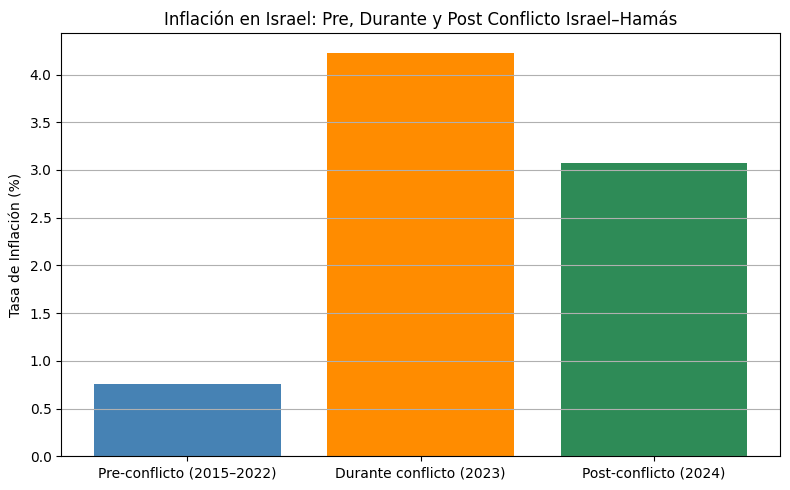

                     Periodo  Inflación (%)
0  Pre-conflicto (2015–2022)       0.754977
1   Durante conflicto (2023)       4.225352
2      Post-conflicto (2024)       3.070526


In [31]:

inflacion_fusionado['Country'] = inflacion_fusionado['Country'].str.strip()
df_israel = inflacion_fusionado[inflacion_fusionado['Country'] == 'Israel']

pre_conflict_years = [str(year) for year in range(2015, 2023)]
conflict_year = '2023'
post_conflict_year = '2024'

pre_avg = df_israel[pre_conflict_years].mean(axis=1).values[0]
conflict_val = df_israel[conflict_year].values[0]
post_val = df_israel[post_conflict_year].values[0]

resumen = pd.DataFrame({
    'Periodo': ['Pre-conflicto (2015–2022)', 'Durante conflicto (2023)', 'Post-conflicto (2024)'],
    'Inflación (%)': [pre_avg, conflict_val, post_val]
})

plt.figure(figsize=(8, 5))
plt.bar(resumen['Periodo'], resumen['Inflación (%)'], color=['steelblue', 'darkorange', 'seagreen'])
plt.title('Inflación en Israel: Pre, Durante y Post Conflicto Israel–Hamás')
plt.ylabel('Tasa de Inflación (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(resumen)

/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/912835921.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_similar, y='Country', x='Similarity', palette='viridis')


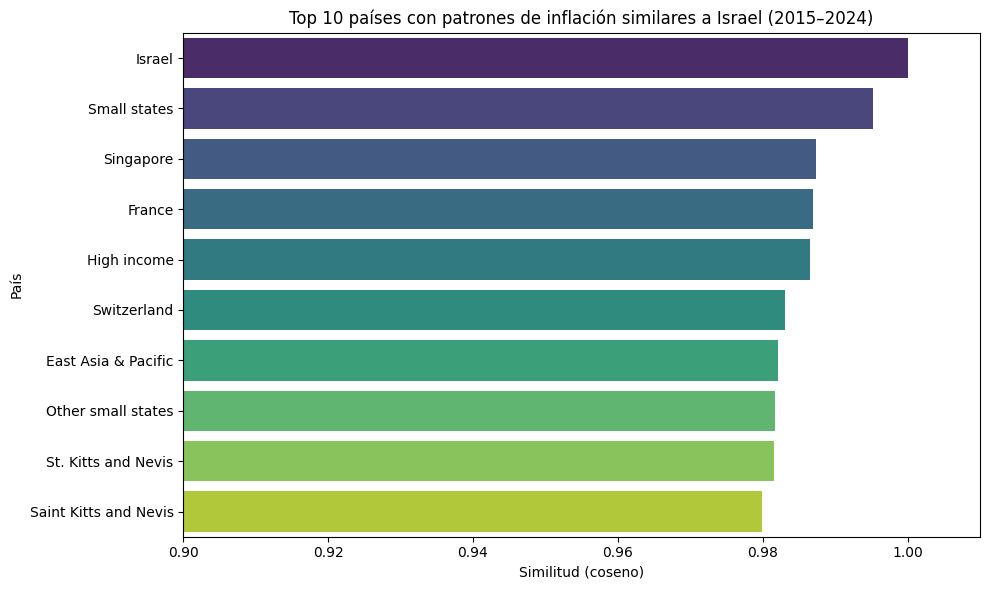

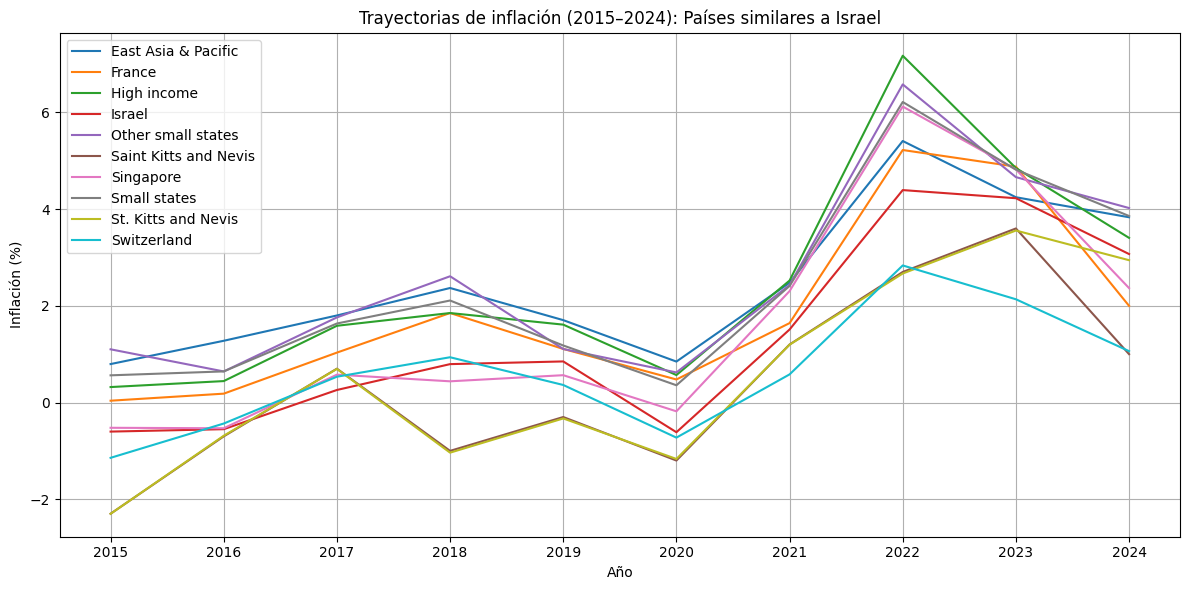

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

df = inflacion_fusionado.copy()


cols_2015_onward = [str(year) for year in range(2015, 2025)]
df_filtered = df[['Country'] + cols_2015_onward].dropna()

df_filtered['Country'] = df_filtered['Country'].str.strip()
israel_row = df_filtered[df_filtered['Country'] == 'Israel']

if israel_row.empty:
    raise ValueError("Israel no está presente en el DataFrame después de filtrar.")

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_filtered[cols_2015_onward])
data_scaled_df = pd.DataFrame(data_scaled, columns=cols_2015_onward, index=df_filtered['Country'])

similarity_scores = cosine_similarity(
    data_scaled_df.loc[['Israel']], 
    data_scaled_df
)[0]

similar_df = pd.DataFrame({
    'Country': data_scaled_df.index,
    'Similarity': similarity_scores
}).sort_values(by='Similarity', ascending=False)
top_similar = similar_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_similar, y='Country', x='Similarity', palette='viridis')
plt.title('Top 10 países con patrones de inflación similares a Israel (2015–2024)')
plt.xlabel('Similitud (coseno)')
plt.ylabel('País')
plt.xlim(0.9, 1.01)
plt.tight_layout()
plt.show()

top_countries = top_similar['Country'].tolist()
subset = df_filtered[df_filtered['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
for _, row in subset.iterrows():
    plt.plot(cols_2015_onward, row[cols_2015_onward], label=row['Country'])
plt.title('Trayectorias de inflación (2015–2024): Países similares a Israel')
plt.xlabel('Año')
plt.ylabel('Inflación (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


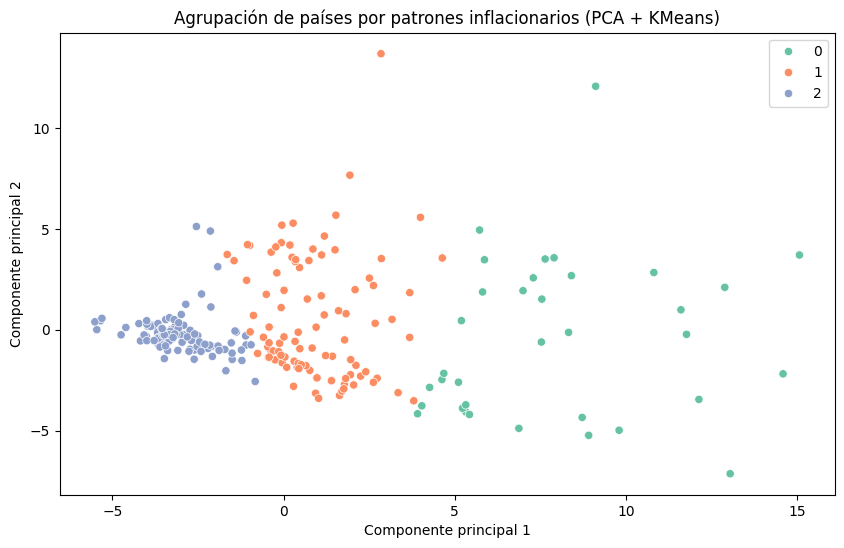

In [20]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(standardized_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
inflacion_fusionado['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Agrupación de países por patrones inflacionarios (PCA + KMeans)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


In [21]:
inflacion_fusionado

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,Inflation_Avg,Inflation_Level,Cluster
0,ASEAN-5,16.600000,12.000000,7.800000,7.300000,14.000000,6.800000,2.900000,5.300000,6.500000,...,2.600000,1.900000,0.900000,2.000000,4.800000,3.500000,2.000000,6.164444,1,1
1,Advanced economies,13.600000,11.100000,8.400000,6.100000,6.500000,5.500000,2.900000,3.200000,3.600000,...,2.000000,1.400000,0.700000,3.100000,7.300000,4.600000,2.600000,3.308889,0,2
2,Afghanistan,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,5.253530,...,0.626149,2.302373,5.601888,5.133203,13.712102,-4.644709,-6.601186,5.253530,1,1
3,Africa (Region),16.900000,15.900000,14.800000,16.200000,14.000000,13.900000,17.500000,17.000000,14.900000,...,11.400000,9.400000,11.100000,12.300000,14.200000,18.200000,20.100000,14.493333,2,0
4,Africa Eastern and Southern,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522258,...,4.720805,4.644967,5.405162,7.240978,10.773751,7.126975,10.100749,9.705824,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Western Hemisphere (Region),22.900000,21.200000,20.900000,23.000000,24.200000,26.100000,21.500000,29.400000,41.900000,...,3.700000,3.500000,2.700000,6.200000,9.800000,7.200000,6.900000,13.648889,2,1
252,World,5.365736,12.442437,10.221727,8.669272,8.080320,6.807567,5.778113,5.710119,7.113407,...,2.442583,2.206073,1.905664,3.475403,7.930929,5.733163,5.365736,7.251767,1,2
253,Yemen,21.079394,17.254706,16.787135,18.415789,25.305263,89.905263,23.697076,97.301734,53.413295,...,33.600000,15.700000,21.700000,31.500000,29.500000,0.900000,33.900000,29.304042,2,0
254,"Yemen, Rep.",17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,...,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,17.495677,2,0


In [22]:

inflacion_fusionado['Inflation_Avg'] = inflacion_fusionado[year_cols].mean(axis=1)
inflacion_fusionado.groupby('Cluster')['Inflation_Avg'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,35.0,33.317258,23.838818,9.054671,14.360513,26.568349,45.296983,92.597451
1,101.0,14.386051,9.215480,5.253530,7.445939,9.531111,21.755532,52.882199
2,120.0,4.202500,3.235445,0.464619,2.929799,3.686182,4.531801,25.452711


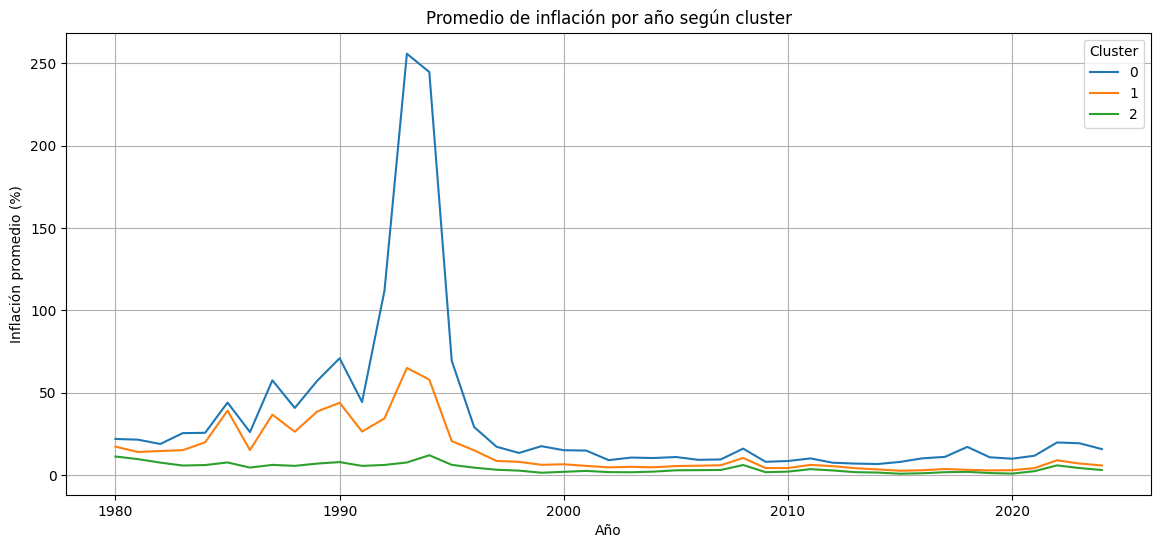

In [23]:
cluster_means = inflacion_fusionado.groupby('Cluster')[year_cols].mean().T
cluster_means.plot(figsize=(14, 6))
plt.title('Promedio de inflación por año según cluster')
plt.ylabel('Inflación promedio (%)')
plt.xlabel('Año')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


- Cluster 0 Alta inflación, con picos extremos en los 80s-90s (hiperinflación), gran variabilidad.
- Cluster 1 Inflación baja y consistente en el tiempo. Seguramente incluye países desarrollados.
- Cluster 2 También inflación alta, pero más controlada que en el cluster 0; podría incluir países emergentes.

/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/2393463599.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bloques_df['Country'] = pd.Categorical(bloques_df['Country'], categories=bloques_ordenados, ordered=True)


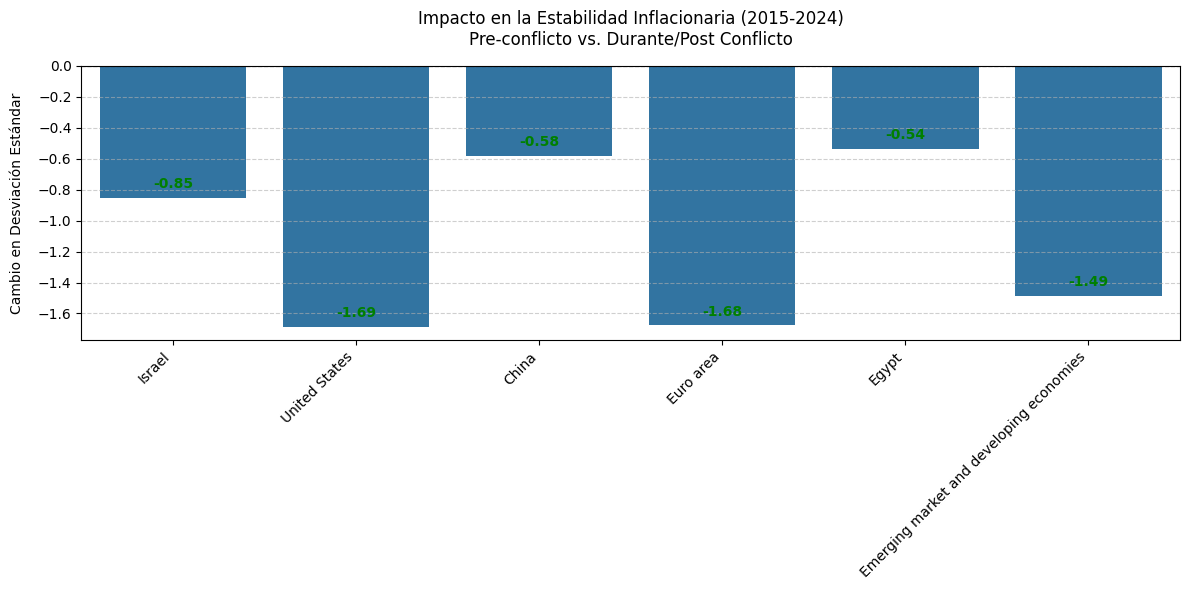


Resumen de Cambios en Estabilidad Inflacionaria:
                                 Country  Cambio en Estabilidad
                                  Israel              -0.851935
                           United States              -1.686967
                                   China              -0.581399
                               Euro area              -1.677126
                                   Egypt              -0.540437
Emerging market and developing economies              -1.488078


In [24]:

df = inflacion_fusionado.copy()
cols = [str(year) for year in range(2015, 2025)]
df_filtered = df[['Country'] + cols].dropna(thresh=len(cols)*0.8)
try:
    pre_conflicto_std = df_filtered[[str(y) for y in range(2015, 2023)]].std(axis=1)
    post_conflicto_std = df_filtered[['2023', '2024']].std(axis=1)
except KeyError as e:
    print(f"Error: Columna no encontrada - {e}")
    raise

df_filtered['Estabilidad Pre-conflicto'] = pre_conflicto_std
df_filtered['Estabilidad Post-conflicto'] = post_conflicto_std
df_filtered['Cambio en Estabilidad'] = post_conflicto_std - pre_conflicto_std

bloques_ordenados = [
     'Israel',
    'United States', 'China', 'Euro area', 'Egypt',
    'Emerging market and developing economies'
]

bloques_df = df_filtered[df_filtered['Country'].isin(bloques_ordenados)]
bloques_df['Country'] = pd.Categorical(bloques_df['Country'], categories=bloques_ordenados, ordered=True)
bloques_df = bloques_df.sort_values('Country')

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=bloques_df,
    x='Country', 
    y='Cambio en Estabilidad',
    order=bloques_ordenados 
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Impacto en la Estabilidad Inflacionaria (2015-2024)\nPre-conflicto vs. Durante/Post Conflicto', pad=15)
plt.ylabel('Cambio en Desviación Estándar', labelpad=10)
plt.xlabel('')

plt.xticks(rotation=45, ha='right', fontsize=10)

for p in ax.patches:
    color = 'red' if p.get_height() > 0 else 'green'
    ax.annotate(
        f"{p.get_height():.2f}", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        color=color,
        fontweight='bold'
    )

ax.yaxis.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("\nResumen de Cambios en Estabilidad Inflacionaria:")
print(bloques_df[['Country', 'Cambio en Estabilidad']].to_string(index=False))

A pesar del conflicto en curso, las tendencias inflacionarias de Israel se han mantenido relativamente estables en comparación con sus pares mundiales, sin indicios inmediatos de volatilidad inflacionaria grave. Sin embargo, los riesgos persisten y justifican un seguimiento continuo.

In [25]:
vida = pd.read_csv('../Life_expectancy/life_expectancy_fusionada.csv', encoding='latin1')
inflacion = pd.read_csv('../Inflacion/inflacion_fusionada.csv', encoding='latin1')

In [26]:
vida['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of China', 'Colombia', 'Comoros', 'Congo',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Curaçao

/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/30944805.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[año] = pd.to_numeric(df[año], errors='coerce')
/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/30944805.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.groupby('País').apply(lambda x: x.interpolate()).reset_index(drop=True)
/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/30944805.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating inst

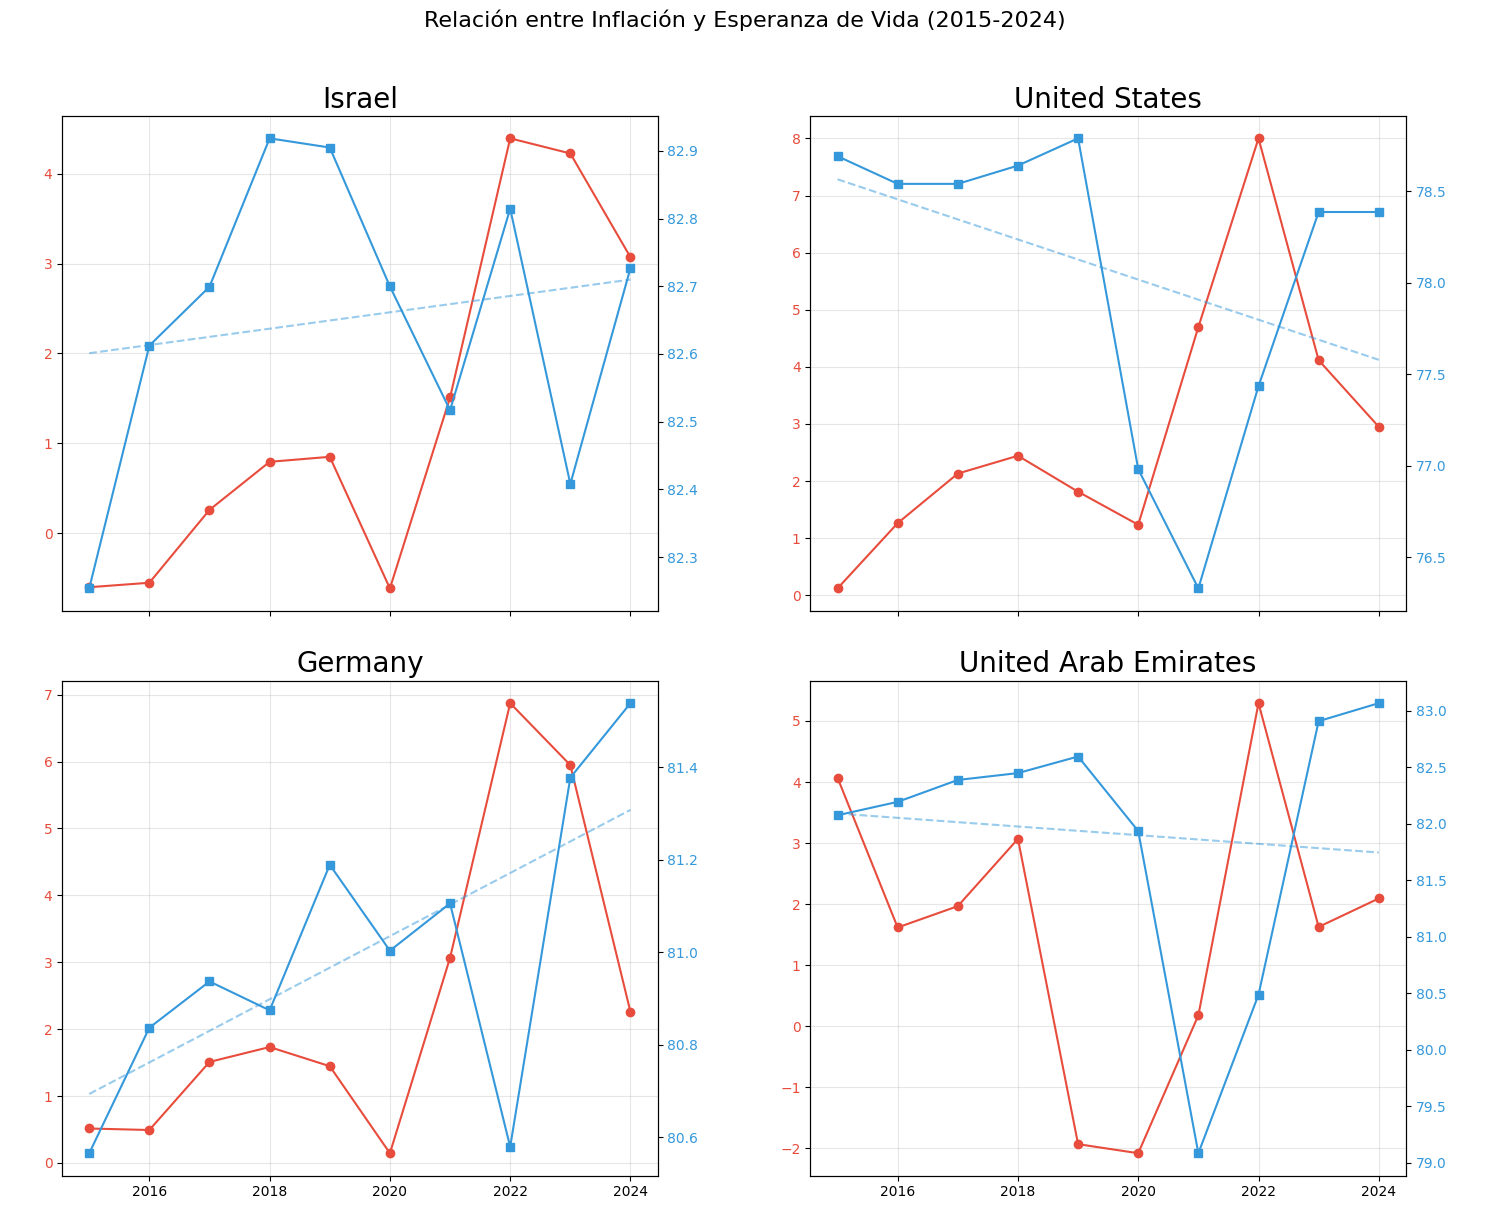


Correlación entre Inflación y Esperanza de Vida por país:
Israel: 0.090
United States: -0.467
Germany: 0.082
United Arab Emirates: -0.068


In [27]:

paises_interes = ['Israel', 'United States', 'Germany', 'United Arab Emirates']
paises_disponibles = set(inflacion['Country']) & set(vida['Country'])
paises_validos = [p for p in paises_interes if p in paises_disponibles]

if not paises_validos:
    raise ValueError("No hay países comunes entre los datasets")

def procesar_datos(df, paises, años):
    df = df[df['Country'].isin(paises)]

    for año in años:
        df[año] = pd.to_numeric(df[año], errors='coerce')
    return df.set_index('Country')

años = [str(y) for y in range(2015, 2025)]
inflacion_sel = procesar_datos(inflacion, paises_validos, años)
vida_sel = procesar_datos(vida, paises_validos, años)


datos_combinados = []
for pais in paises_validos:
    for año in años:
        try:
            datos_combinados.append({
                'País': pais,
                'Año': int(año),
                'Inflación': inflacion_sel.loc[pais, año],
                'Esperanza de vida': vida_sel.loc[pais, año]
            })
        except KeyError:
            continue

df = pd.DataFrame(datos_combinados)


df = df.groupby('País').apply(lambda x: x.interpolate()).reset_index(drop=True)


def crear_visualizacion(df):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True)
    fig.suptitle('Relación entre Inflación y Esperanza de Vida (2015-2024)', 
                fontsize=16, y=1.02)
    
    for idx, pais in enumerate(paises_validos):
        ax = axs[idx//2, idx%2]
        data = df[df['País'] == pais]

        ax.plot(data['Año'], data['Inflación'], color='#E74C3C', marker='o', label='Inflación (%)')
        ax.set_xlabel(' ', fontsize=10)
        ax.set_ylabel(' ', color='#E74C3C', fontsize=20)
        ax.tick_params(axis='y', labelcolor='#E74C3C')
        
        ax2 = ax.twinx()
        ax2.plot(data['Año'], data['Esperanza de vida'], color='#3498DB', 
                marker='s', label='Esperanza de vida')
        ax2.set_ylabel(' ', color='#3498DB', fontsize=20)
        ax2.tick_params(axis='y', labelcolor='#3498DB')
        
        z = np.polyfit(data['Año'], data['Esperanza de vida'], 1)
        p = np.poly1d(z)
        ax2.plot(data['Año'], p(data['Año']), "--", color='#3498DB', alpha=0.5)
        
        ax.set_title(pais, fontsize=20)
        ax.grid(True, alpha=0.3)
        
    
    plt.tight_layout()
    plt.show()

crear_visualizacion(df)


print("\nCorrelación entre Inflación y Esperanza de Vida por país:")
for pais in paises_validos:
    corr = df[df['País'] == pais][['Inflación', 'Esperanza de vida']].corr().iloc[0,1]
    print(f"{pais}: {corr:.3f}")

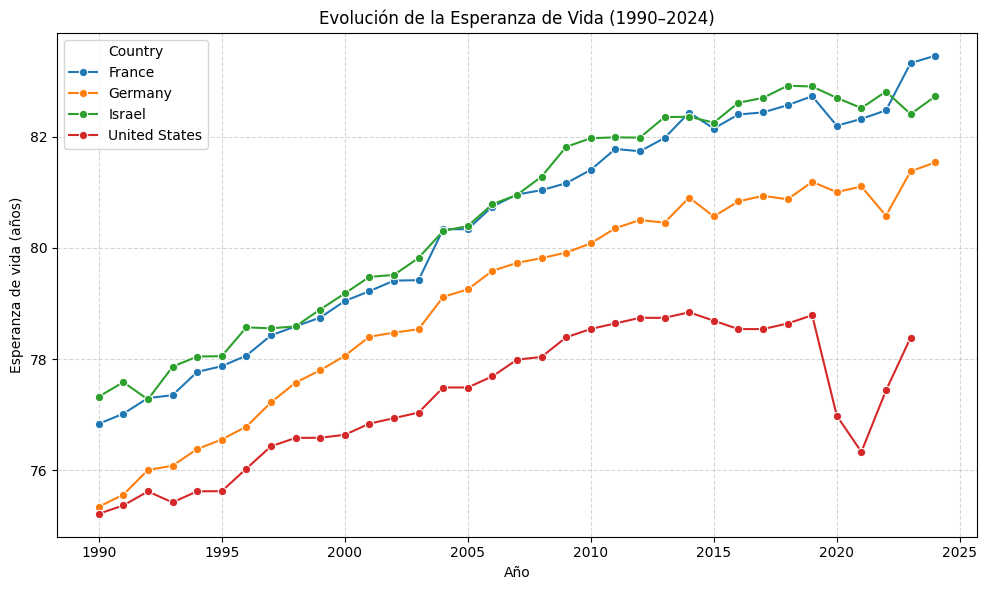

In [ ]:
vida = pd.read_csv('../Life_expectancy/life_expectancy_fusionada.csv', encoding='latin1')

vida_long = vida.melt(id_vars=["Country", "ISO3"], var_name="Año", value_name="Esperanza de vida")
vida_long["Año"] = vida_long["Año"].astype(int)


paises = ["Israel", "Germany", "United States", "France"]
vida_filtrada = vida_long[vida_long["Country"].isin(paises)]


plt.figure(figsize=(10, 6))
sns.lineplot(data=vida_filtrada, x="Año", y="Esperanza de vida", hue="Country", marker="o")
plt.title("Evolución de la Esperanza de Vida (1990–2024)")
plt.ylabel("Esperanza de vida (años)")
plt.xlabel("Año")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/1722634915.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bloques_df['Country'] = pd.Categorical(bloques_df['Country'], categories=bloques_ordenados, ordered=True)
/var/folders/kg/pw7sp_px4212hlfyfrbc1sq80000gn/T/ipykernel_71020/1722634915.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


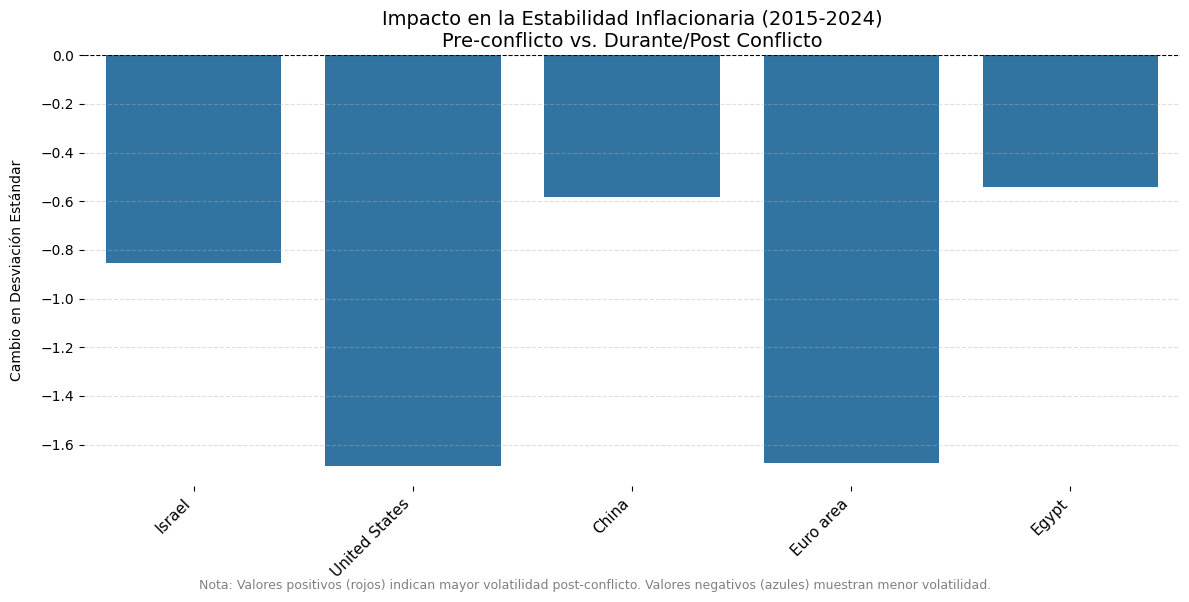

In [33]:



df = inflacion_fusionado.copy()
cols = [str(year) for year in range(2015, 2025)]
df_filtered = df[['Country'] + cols].dropna(thresh=len(cols)*0.8)

pre_conflicto_std = df_filtered[[str(y) for y in range(2015, 2023)]].std(axis=1)
post_conflicto_std = df_filtered[['2023', '2024']].std(axis=1)

df_filtered['Estabilidad Pre-conflicto'] = pre_conflicto_std
df_filtered['Estabilidad Post-conflicto'] = post_conflicto_std
df_filtered['Cambio en Estabilidad'] = post_conflicto_std - pre_conflicto_std

bloques_ordenados = [
    'Israel',
    'United States', 
    'China', 
    'Euro area', 
    'Egypt'
]

bloques_df = df_filtered[df_filtered['Country'].isin(bloques_ordenados)]
bloques_df['Country'] = pd.Categorical(bloques_df['Country'], categories=bloques_ordenados, ordered=True)
bloques_df = bloques_df.sort_values('Country')

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=bloques_df,
    x='Country', 
    y='Cambio en Estabilidad',
    order=bloques_ordenados,
    palette=['#1f77b4' if x < 0 else '#d62728' for x in bloques_df['Cambio en Estabilidad']]  # Azul brillante para negativos, rojo para positivos
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Impacto en la Estabilidad Inflacionaria (2015-2024)\nPre-conflicto vs. Durante/Post Conflicto', fontsize=14)
plt.ylabel('Cambio en Desviación Estándar', labelpad=12)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=11)


ax.yaxis.grid(True, linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

plt.figtext(0.5, 0.01, 
           "Nota: Valores positivos (rojos) indican mayor volatilidad post-conflicto. Valores negativos (azules) muestran menor volatilidad.",
           ha="center", fontsize=9, color='gray')

plt.tight_layout()
plt.savefig('estabilidad_inflacion_mejorada.png', dpi=300, bbox_inches='tight')
plt.show()